<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/11a_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers (valores atípicos)

En estadística, un valor atípico (outlier) es un punto de datos que difiere significativamente de otras observaciones. Un valor atípico puede deberse a la variabilidad en la medición o puede indicar un error experimental; estos últimos a veces se excluyen del conjunto de datos. **Un valor atípico es algo que es diferente o que está separado del resto**.


## Conjunto de datos

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [71]:
# cargar el dataset
import os

URL = 'https://raw.githubusercontent.com/orlandxrf/curso-dl/main/data/diabetes.csv'
data_folder = 'data'
filepath = os.path.join(data_folder, 'diabetes.csv')

# crear carpeta para almacenar el conjunto de datos
! mkdir {data_folder}
# descargar conjunto de datos y alamcenar
! wget -nc {URL} -O {filepath}

mkdir: cannot create directory ‘data’: File exists
File ‘data/diabetes.csv’ already there; not retrieving.


In [72]:
# visualizar el dataset
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [73]:
df.shape

(768, 9)

## ¿Cómo detectar outliers?
Se pueden detectar los valores atípicos por los métodos de:


### 1. Métodos de visualización
Hay diferentes gráficos que se usan para identificar los valores atípicos, algunos son:

*   Histograma
*   Distribución
*   Diagramas de caja (box plot)
*   Dispersión (scatter plot)


#### Histograma

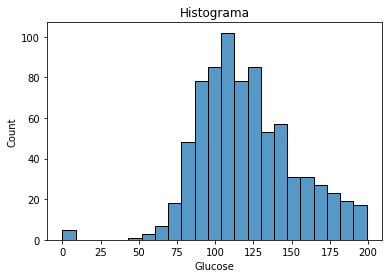

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.histplot(df['Glucose'])
plt.title("Histograma")
plt.show()

#### Distribución

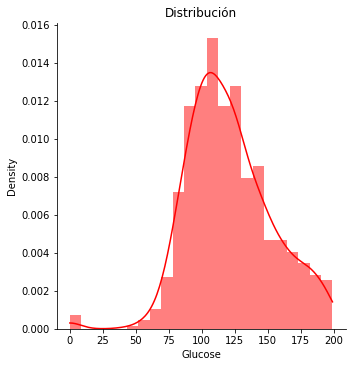

In [75]:
sns.displot(df['Glucose'], kde=True, stat="density", linewidth=0, color="red")
plt.title("Distribución")
plt.show()

#### Box plot

Captura el resumen de los datos de manera efectiva y eficiente con solo una simple caja y bigotes.

Boxplot resume los datos de muestra utilizando los percentiles 25, 50 y 75. Se puede obtener información (cuartiles, mediana y valores atípicos) en el conjunto de datos con solo simplemente mirar su diagrama de caja.

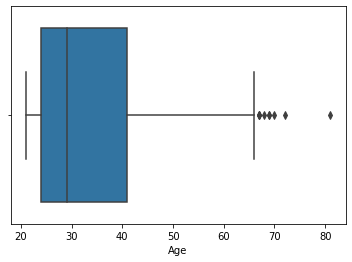

Indexes: (array([123, 453, 459, 666, 674, 684]),)
Age: 69 72 81 70 68 69


In [76]:
sns.boxplot(x=df['Age'])
plt.show()

# mostrar outliers con una edad mayor a 67
print(f"Indexes: {np.where(df['Age'] > 67)}")
print ("Age:", df['Age'][123], df['Age'][453], df['Age'][459], df['Age'][666], df['Age'][674], df['Age'][684])

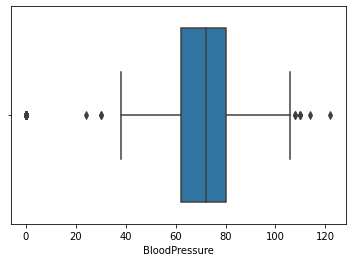

(array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
       332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
       535, 589, 601, 604, 619, 643, 697, 703, 706]),)
(array([ 43,  84, 106, 177, 362, 549, 658, 662, 672, 691]),)


In [77]:
sns.boxplot(x=df['BloodPressure'])
plt.show()

print(np.where(df['BloodPressure'] == 0))
print(np.where(df['BloodPressure'] > 105))

#### Scatter plot

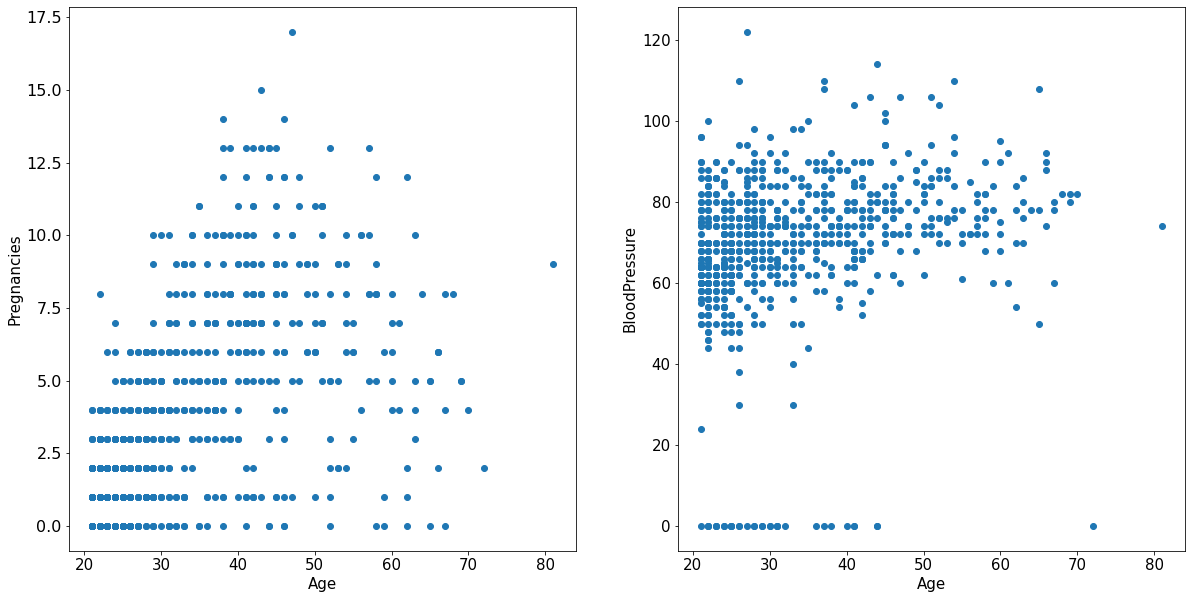

In [78]:
axis_font = {'size':'15'}

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1,2,1) 

ax1.scatter(df['Age'], df['Pregnancies'])
ax1.set_xlabel('Age', **axis_font)
ax1.set_ylabel('Pregnancies', **axis_font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)

ax2 = plt.subplot(1,2,2)
ax2.scatter(df['Age'], df['BloodPressure'])
ax2.set_xlabel('Age', **axis_font)
ax2.set_ylabel('BloodPressure', **axis_font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [79]:
# mostrar embarazos a una edad mayor a 75
print (np.where((df['Age'] > 75) & (df['Pregnancies'] > 8)))

print (df['Pregnancies'][459])
print (df['Age'][459])

(array([459]),)
9
81


In [80]:
# mostrar los outliers que tienen una presión de sangre igual a cero
tmp = np.where((df['Age'] > 20) & (df['BloodPressure'] == 0))

print ("#\tIndex\tAge\tBloodPressure")
for i, item in enumerate(tmp[0]):
    print (f"{i+1}\t{item}\t{df['Age'][item]}\t{df['BloodPressure'][item]}")

#	Index	Age	BloodPressure
1	7	29	0
2	15	32	0
3	49	24	0
4	60	21	0
5	78	26	0
6	81	22	0
7	172	25	0
8	193	40	0
9	222	37	0
10	261	27	0
11	266	25	0
12	269	28	0
13	300	30	0
14	332	41	0
15	336	44	0
16	347	23	0
17	357	44	0
18	426	25	0
19	430	23	0
20	435	29	0
21	453	72	0
22	468	38	0
23	484	31	0
24	494	22	0
25	522	26	0
26	533	31	0
27	535	23	0
28	589	25	0
29	601	28	0
30	604	36	0
31	619	24	0
32	643	31	0
33	697	22	0
34	703	41	0
35	706	30	0


## Transformaciones
* Escalar (Scalling)
* Transormación Log (Log transformation)
* Normalización de raíz cúbica (Cube Root Normalization)
* Transformación Box-Cox (Box-Cox transformation)

La transformación Box-Cox es usada en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales (para diferentes valores de la variable predictora) y principalmente para corregir la no linealidad en la relación (mejorar correlación entre las variables).

### Scalling

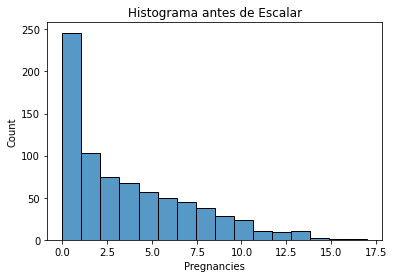

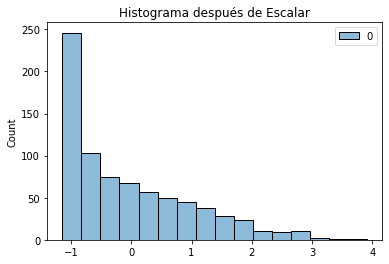

In [81]:
from sklearn import preprocessing

sns.histplot(df['Pregnancies'])
plt.title("Histograma antes de Escalar")
plt.show()

# Scalling
scaler = preprocessing.StandardScaler()
tmp_scalling = scaler.fit_transform(df['Pregnancies'].values.reshape(-1,1))
sns.histplot(tmp_scalling)
plt.title("Histograma después de Escalar")
plt.show()

### Log Transformation

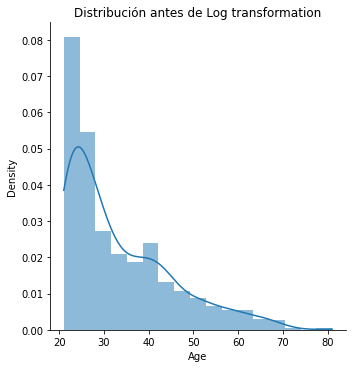

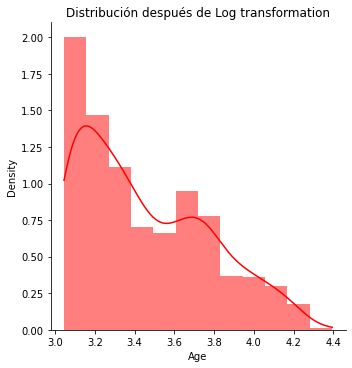

In [82]:
sns.displot(df['Age'], kde=True, stat="density", linewidth=0)
plt.title("Distribución antes de Log transformation")
sns.despine()
plt.show()

tmp_log_transf = np.log(df['Age'])
sns.displot(tmp_log_transf, kde=True, stat="density", linewidth=0, color="red")
plt.title("Distribución después de Log transformation")
sns.despine()
plt.show()

### Cube Root Normalization

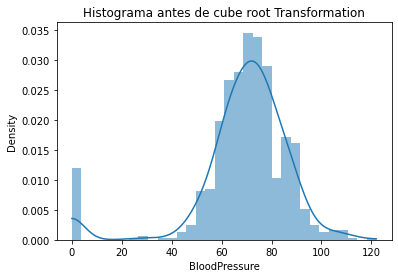

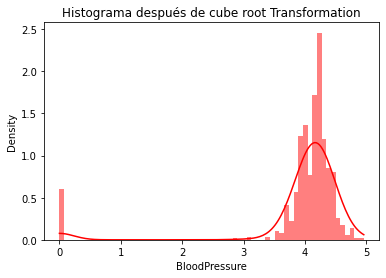

In [89]:
sns.histplot(df['BloodPressure'], kde=True, stat="density", linewidth=0)
plt.title("Histograma antes de cube root Transformation")
plt.show()

tmp_cube_root = (df['BloodPressure']**(1/3))
sns.histplot(tmp_cube_root, kde=True, stat="density", linewidth=0, color="red")
plt.title("Histograma después de cube root Transformation")
plt.show()

### Box-Cox transformation


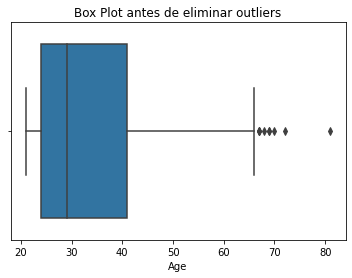

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64



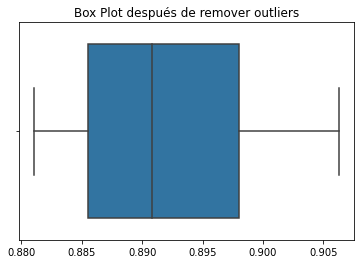

0      0.901093
1      0.892411
2      0.893138
3      0.881083
4      0.893820
         ...   
763    0.903915
764    0.888932
765    0.891632
766    0.900208
767    0.884177
Length: 768, dtype: float64


In [99]:
from scipy.stats import boxcox

sns.boxplot(x=df['Age'])
plt.title("Box Plot antes de eliminar outliers")
plt.show()
print (f"{df['Age']}\n")

tmp_box_cox, fitted_lambda = boxcox(df['Age'], lmbda=None)
sns.boxplot(x=tmp_box_cox)
plt.title("Box Plot después de remover outliers")
plt.show()
print (f"{pd.Series(tmp_box_cox)}")


## Método Z-score

El Z-score es una medida estadística que indica qué tan lejos está un punto de datos del resto del conjunto de datos. En un término más técnico, asume que la variable tiene una distribución Gaussiana, e indica a cuántas desviaciones estándar se encuentra una observación dada de la media.
<br><br>

[Regla **three sigma** o **68–95–99.7** o **empírica**](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/1024px-Empirical_rule_histogram.svg.png" alt="drawing" width="500"/>

<br><br>
$z = \frac{(\text{punto de datos } - \text{ media})}{\text{desviacion estandar}}$
<br><br>
$z = \frac{(x - \mu)}{\sigma}$

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df))
# print (z)
print (f"\nTamaño de z: {len(z):,} \t Tamaño dataset: {len(df):,}")

threshold = 3
 
# Posiciones de los outliers
# el primer array indica el índice de los renglones y
# el segundo array indica el índice de las columnas
print ("\nOutliers detectados con Z-score:\n")
print (f"{np.where(z > threshold)}")

print (f"\nZ-score[4][6]: {z[4][6]} es mayor al umbral: {threshold}")

columnas = df.columns.tolist()

print (f"\nOutlier detectado en: {columnas[6]}\t{df[columnas[6]][4]}")
print (f"Outlier detectado en: {columnas[2]}\t{df[columnas[2]][7]}")
print (f"Outlier detectado en: {columnas[4]}\t{df[columnas[4]][8]}")


Tamaño de z: 768 	 Tamaño dataset: 768

Outliers detectados con Z-score:

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))

Z-score[4][6]: 5.48490910046695 es mayor al umbral: 3

Outlier detectado en: Diabete

In [ ]:
# crear una instancia de outliers del dataframe original

df_without_outliers = df[(z < threshold).all(axis=1)]

df_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print (f"dataset original: {df.shape}\ndataset sin outliers: {df_without_outliers.shape}")

dataset original: (768, 9)
dataset sin outliers: (688, 9)


## IQR
El enfoque de rango intercuartílico (Interquartile Range: IQR) para encontrar los outliers es uno de los enfoques más utilizado y confiable en el campo de la investigación.

<br><br>
![IQR](https://media.geeksforgeeks.org/wp-content/uploads/20201026171856/1.png)

![IQR2](https://media.geeksforgeeks.org/wp-content/uploads/20201026171933/2.png)

<br><br>

$IQR = Q3 – Q1$

El rango intercuartílico muestra cómo se distribuyen los datos sobre la mediana.
IQR es algo similar a Z-score en términos de encontrar la distribución de datos y luego mantener algún umbral para identificar el valor atípico.

Para detectar outliers seguir los siguientes pasos:

1.   Calcular el rango intercuartílico de los datos.
2.   Multiplicar el rango intercuartílico (IQR) por 1,5 (una constante utilizada para discernir valores atípicos).
3.   Agregar 1.5 x (IQR) al tercer cuartil. Cualquier número mayor que este es un valor atípico sospechoso.
4.   Restar 1,5 x (IQR) del primer cuartil. Cualquier número menor que este es un valor atípico sospechoso.

> **Nota**: La regla intercuartil es solo una regla empírica que generalmente se cumple pero no se aplica a todos los casos. En general, siempre debe realizar un seguimiento de su análisis de valores atípicos estudiando los valores atípicos resultantes para ver si tienen sentido. Cualquier posible valor atípico obtenido por el método intercuartílico debe examinarse en el contexto de todo el conjunto de datos.

In [ ]:
# IQR para Pregnancies
Q1 = np.percentile(df['Pregnancies'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Pregnancies'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
# definir min y max
upper_bound = df['Pregnancies'] >= (Q3+1.5*IQR)
 
print(f"\nLímite superior: {upper_bound}")
print(np.where(upper_bound))
 
lower_bound = df['Pregnancies'] <= (Q1-1.5*IQR)
print(f"\nLímite inferior: {lower_bound}")
print(np.where(lower_bound))

print ('-'*100)

print ("\nMostrar outliers:\n")

print ("#\tIndex\tPregnancies")
for i, item in enumerate(np.where(upper_bound)[0]):
  print (f"{i+1}\t{item}\t{df['Pregnancies'][item]}")




Límite superior: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool
(array([ 88, 159, 298, 455]),)

Límite inferior: 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Pregnancies, Length: 768, dtype: bool
(array([], dtype=int64),)
----------------------------------------------------------------------------------------------------

Mostrar outliers:

#	Index	Pregnancies
1	88	15
2	159	17
3	298	14
4	455	14


In [ ]:
# IQR para todo el dataset

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(f"El IQR para cada columna:\n\n{IQR}")

El IQR para cada columna:

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


Lo siguiente es para mostrar una salida con algunos valores **verdaderos** y **falsos**. El punto de datos donde tenemos **False** significa que estos valores son válidos, mientras que **True** indica la presencia de un valor atípico.

In [ ]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

TypeError: ignored

In [ ]:
# mostrar conjunto de datos sin outliers
df_without_outliers_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print (f"dataset original: {df.shape}\ndataset sin outliers: {df_without_outliers_iqr.shape}")

dataset original: (768, 9)
dataset sin outliers: (639, 9)


## Empirical-Cumulative-distribution-based Outlier Detection (ECOD)

Paper: [ECOD: Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions](https://arxiv.org/pdf/2201.00382.pdf) 

Biblioteca de Python [Python Outlier Detection (PyOD)](https://github.com/yzhao062/pyod)

In [ ]:
!pip install -U pyod

     |████████████████████████████████| 118 kB 5.1 MB/s 
  Created wheel for pyod: filename=pyod-1.0.0-py3-none-any.whl size=144471 sha256=6c99c8c53fce817aaa7e1185305c12dd1177d60c5ba6a2333d5042b720d40656
  Stored in directory: /root/.cache/pip/wheels/37/e6/25/8098880dadf78bf063ee9b37477b1a9317e8bb0fc06e623187
Successfully built pyod


### Como usar la API

1.   Cargar o generar un conjunto de datos para la detección de valores atípicos (outliers).

In [ ]:
from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
# generar datos sintéticos
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = generate_data(
                      n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:212: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [ ]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# obtener labels de predicción y los scores outliers de los datos de entrenamiento
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

print (f"X_train: {X_train.shape}")
print (f"y_train_pred: {y_train_pred.shape}")
print (f"y_train_scores: {y_train_scores.shape}")

print ("\n")

print (y_train_pred)


X_train: (200, 2)
y_train_pred: (200,)
y_train_scores: (200,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
# obtener la predicción en los datos de prueba
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [ ]:
# evaluar y mostrar los resultados
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


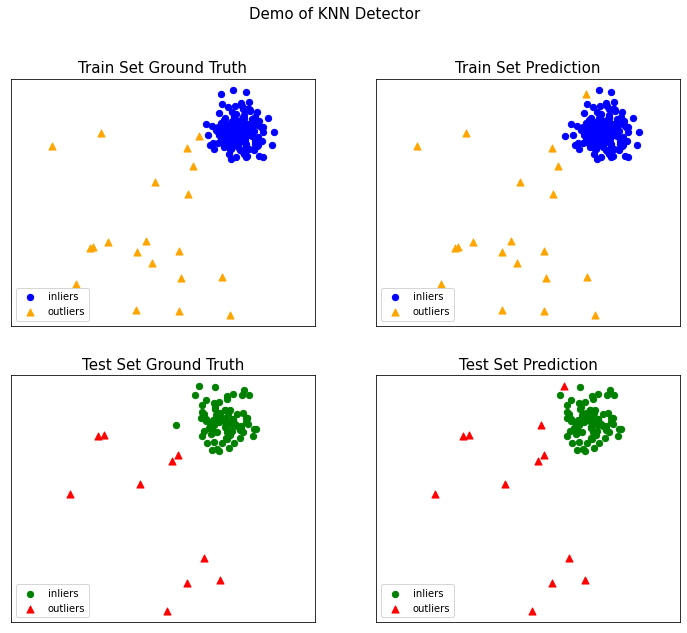

In [ ]:
# visualizar los resultados
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)